# Итоговая работа Python

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. **satisfaction_level** - Уровень удовлетворенности работой (непрерывная шкала)
2. **Last_evaluation** - Время с момента последней оценки в годах (непрерывная шкала)
3. **number_projects** - Количество проектов, выполненных за время работы (интервальная шкала)
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц (интервальная шкала)
5. **time_spend_company** - Стаж работы в компании в годах (интервальная шкала)
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником (категориальная шкала)
7. **left** - уволился ли сотрудник (категориальная шкала)
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет (категориальная шкала)
9. **department** - отдел в котором работает сотрудник (категориальная шкала)
10. **salary** - относительный уровень зарплаты (порядковая шкала)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## 1. Загрузите файл HR.csv в pandas dataframe

In [65]:
df = pd.read_csv('E:\\Обучение ЛЮБА\\Python\\Итоговая работа\\HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [42]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.

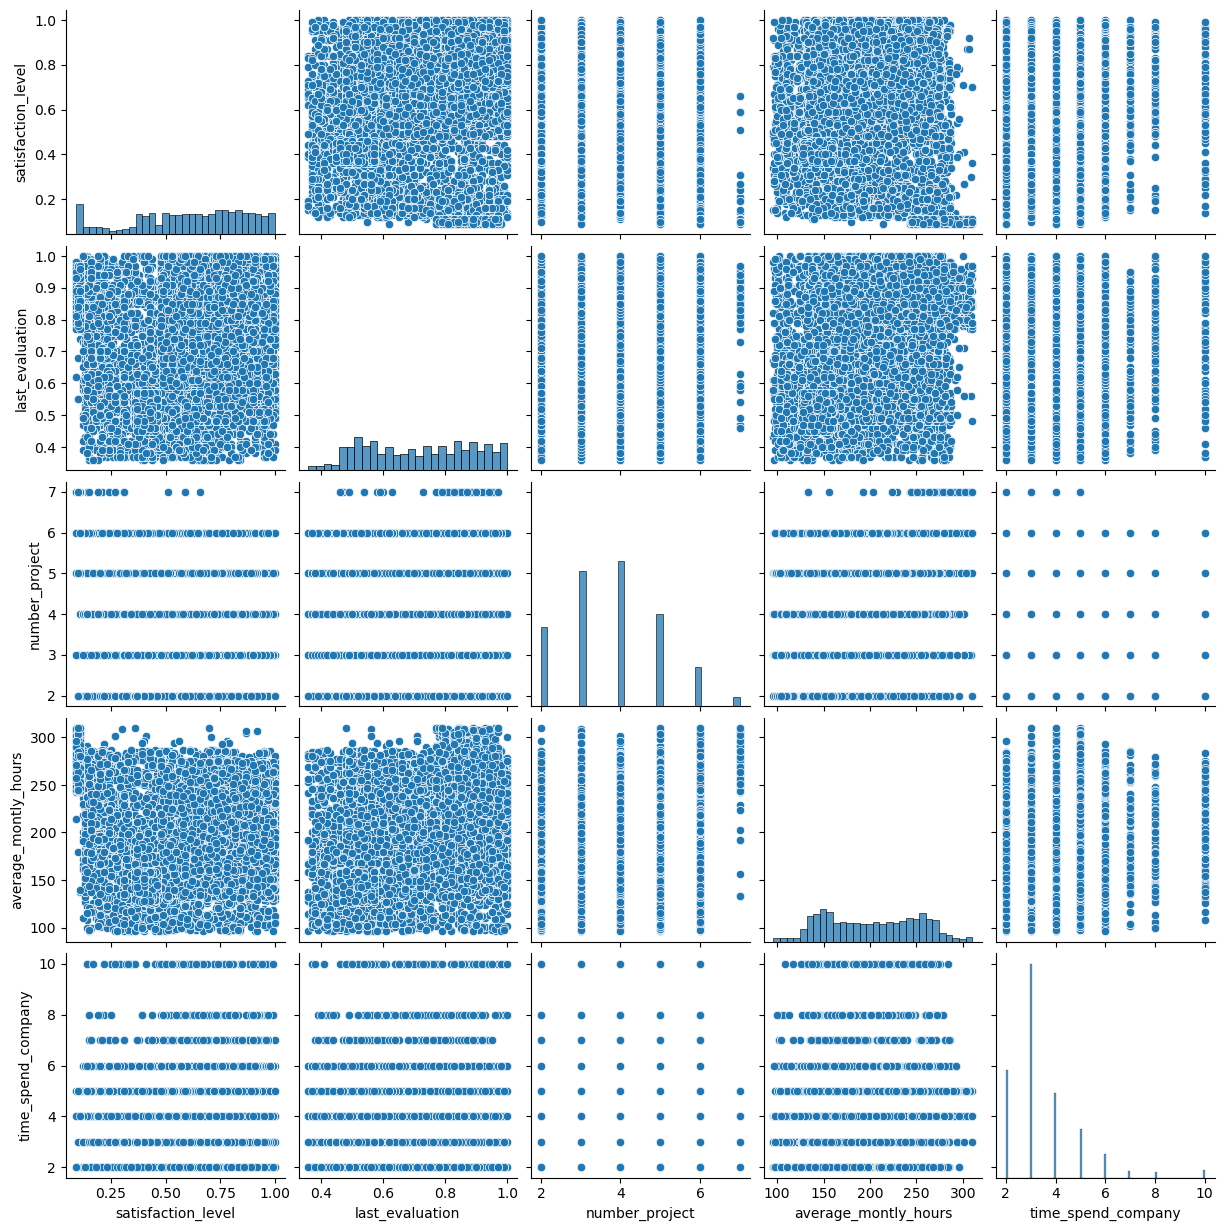

In [11]:
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])

По графикам разброса значений скоррелированных переменных не видно. Чтобы выборать коэффициент корреляции нам придётся изучить данные и сравнить распределения с гауссовским. После этого данные будем стандартизировать (приводить к распределению 0-1). 

### Изучим данные

#### satisfaction_level

<Axes: >

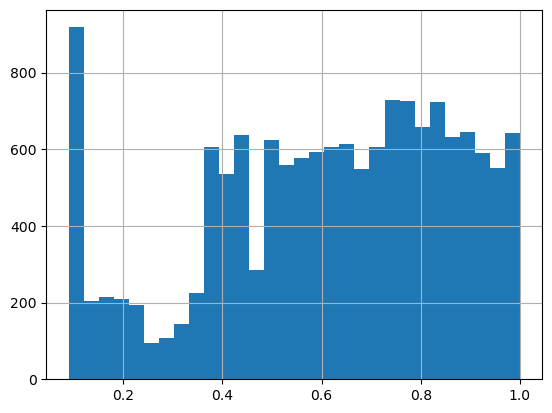

In [13]:
# Гистограмма
df['satisfaction_level'].hist(bins=30)

<Axes: title={'center': 'Уровень удовлетворенности работой'}>

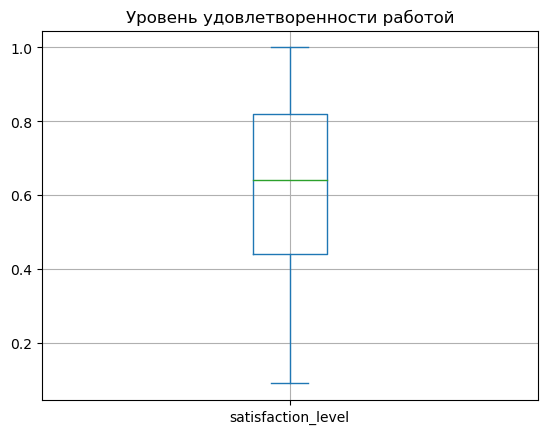

In [14]:
# Посмотрим на распределение, и есть ли выбросы
df['satisfaction_level'].plot(kind='box', title='Уровень удовлетворенности работой', grid=True)

In [18]:
#Проверим, подчиняется ли наше распределение нормальному закону
stat, p = st.kstest(df['satisfaction_level'], 'norm')
print(f"Статистика = {stat:.5f}, p = {p:.15f}")

Статистика = 0.53586, p = 0.000000000000000


##### Вывод:
**satisfaction_level** - распределение очевидно отличается от нормального. Данные в стандартизации не нуждаются. 

#### last_evaluation

<Axes: >

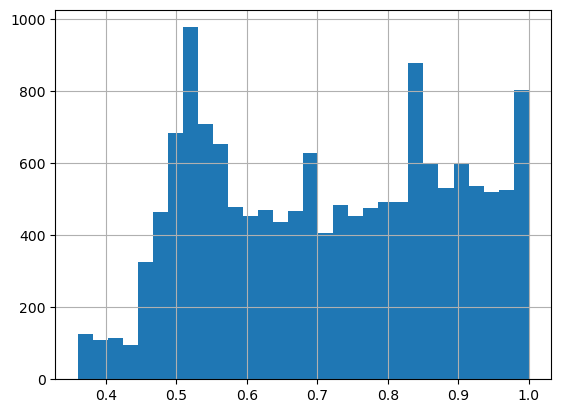

In [19]:
# Гистограмма
df['last_evaluation'].hist(bins=30)

<Axes: title={'center': 'Время с момента последней оценки в годах'}>

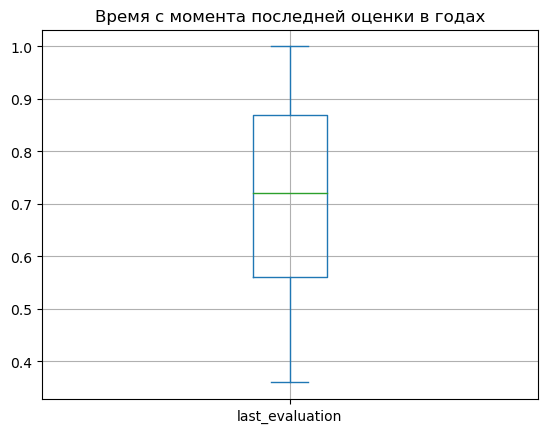

In [32]:
# Посмотрим на распределение, и есть ли выбросы
df['last_evaluation'].plot(kind='box', title='Время с момента последней оценки в годах', grid=True)

In [21]:
#Проверим, подчиняется ли наше распределение нормальному закону
stat, p = st.kstest(df['last_evaluation'], 'norm')
print(f"Статистика = {stat:.5f}, p = {p:.15f}")

Статистика = 0.64398, p = 0.000000000000000


##### Вывод:
**last_evaluation** - распределение очевидно отличается от нормального. Данные в стандартизации не нуждаются. 

#### number_project

<Axes: >

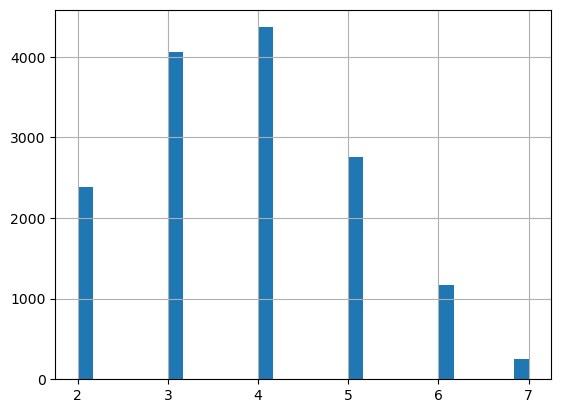

In [22]:
# Гистограмма
df['number_project'].hist(bins=30)

<Axes: title={'center': 'Количество проектов, выполненных за время работы'}>

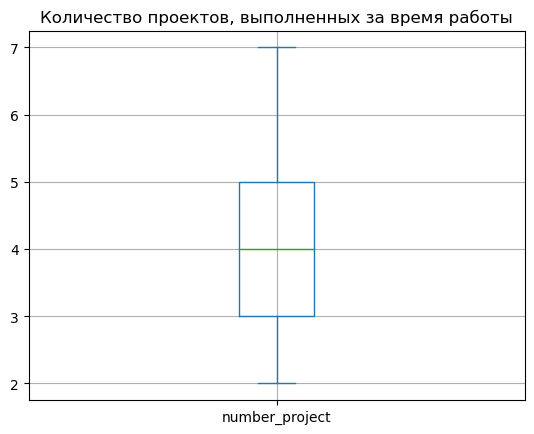

In [33]:
# Посмотрим на распределение
df['number_project'].plot(kind='box', title='Количество проектов, выполненных за время работы', grid=True)

In [24]:
#Проверим, подчиняется ли наше распределение нормальному закону
stat, p = st.kstest(df['number_project'], 'norm')
print(f"Статистика = {stat:.5f}, p = {p:.15f}")

Статистика = 0.97725, p = 0.000000000000000


##### Вывод:
**number_project** - распределение очевидно отличается от нормального. Данные нуждаются в стандартизации. 

#### average_montly_hours

<Axes: >

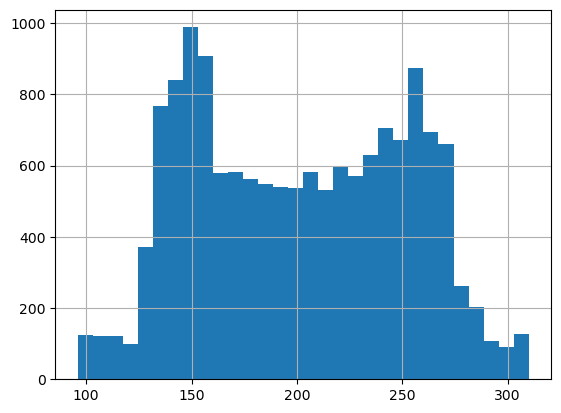

In [26]:
# Гистограмма
df['average_montly_hours'].hist(bins=30)

<Axes: title={'center': 'Среднее количество часов на рабочем месте в месяц'}>

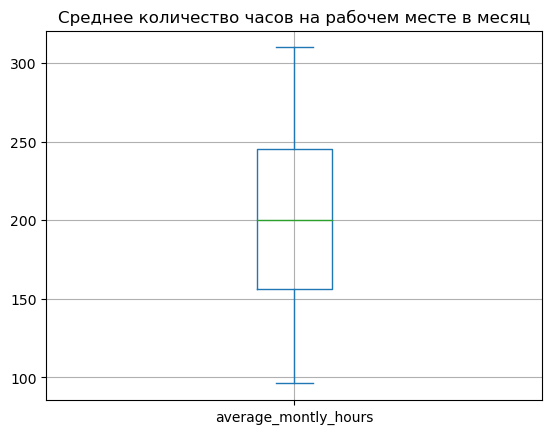

In [34]:
# Посмотрим на распределение и есть ли выбросы
df['average_montly_hours'].plot(kind='box', title='Среднее количество часов на рабочем месте в месяц', grid=True)

In [28]:
#Проверим, подчиняется ли наше распределение нормальному закону
stat, p = st.kstest(df['average_montly_hours'], 'norm')
print(f"Статистика = {stat:.5f}, p = {p:.15f}")

Статистика = 1.00000, p = 0.000000000000000


##### Вывод:
**average_montly_hours** - распределение очевидно отличается от нормального. Данные нуждаются в стандартизации. 

#### time_spend_company

<Axes: >

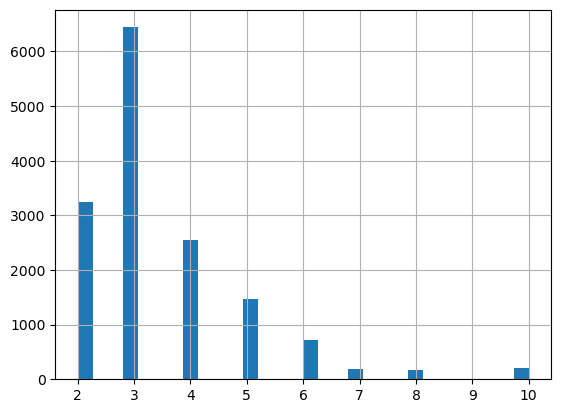

In [29]:
# Гистограмма
df['time_spend_company'].hist(bins=30)

<Axes: title={'center': 'Стаж работы в компании в годах'}>

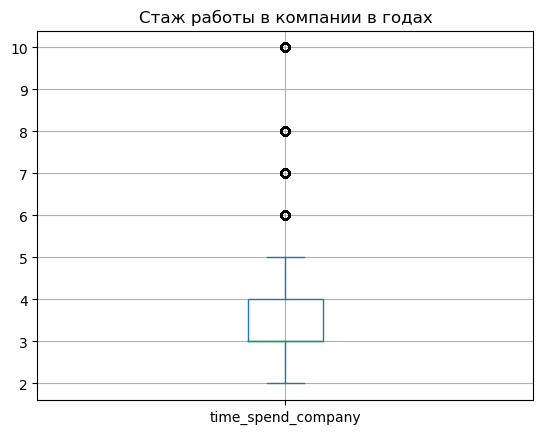

In [35]:
# Посмотрим на распределение и есть ли выбросы
df['time_spend_company'].plot(kind='box', title='Стаж работы в компании в годах', grid=True)

In [36]:
#Проверим, подчиняется ли наше распределение нормальному закону
stat, p = st.kstest(df['time_spend_company'], 'norm')
print(f"Статистика = {stat:.5f}, p = {p:.15f}")

Статистика = 0.97725, p = 0.000000000000000


##### Вывод:
**time_spend_company** - распределение очевидно отличается от нормального. Данные нуждаются в стандартизации. 

### Стандартизируем данные

In [44]:
from sklearn import preprocessing

In [46]:
df_norm = df.copy()

In [50]:
df_norm = df[['number_project', 'average_montly_hours', 'time_spend_company']]
df_norm

,number_project,average_montly_hours,time_spend_company
0,2,157,3
1,5,262,6
2,7,272,4
3,5,223,5
4,2,159,3
...,...,...,...
14994,2,151,3
14995,2,160,3
14996,2,143,3
14997,6,280,4


In [66]:
scaler = preprocessing.MinMaxScaler()
names = df_norm.columns
d = scaler.fit_transform(df_norm)
scaled_df = pd.DataFrame(d, columns=names) 
scaled_df.columns = ['number_project_n', 'average_montly_hours_n', 'time_spend_company_n']
df_norm = df.join(scaled_df)
df_norm = df_norm.drop(['number_project', 'average_montly_hours', 'time_spend_company'], axis=1)
df_norm

,satisfaction_level,last_evaluation,work_accident,left,promotion_last_5years,department,salary,number_project_n,average_montly_hours_n,time_spend_company_n
0,0.38,0.53,0,1,0,sales,low,0.0,0.285047,0.125
1,0.80,0.86,0,1,0,sales,medium,0.6,0.775701,0.500
2,0.11,0.88,0,1,0,sales,medium,1.0,0.822430,0.250
3,0.72,0.87,0,1,0,sales,low,0.6,0.593458,0.375
4,0.37,0.52,0,1,0,sales,low,0.0,0.294393,0.125
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,0,1,0,support,low,0.0,0.257009,0.125
14995,0.37,0.48,0,1,0,support,low,0.0,0.299065,0.125
14996,0.37,0.53,0,1,0,support,low,0.0,0.219626,0.125
14997,0.11,0.96,0,1,0,support,low,0.8,0.859813,0.250


In [67]:
df_norm.describe() # 10 баллов

,satisfaction_level,last_evaluation,work_accident,left,promotion_last_5years,number_project_n,average_montly_hours_n,time_spend_company_n
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,0.144610,0.238083,0.021268,0.360611,0.490889,0.187279
std,0.248631,0.171169,0.351719,0.425924,0.144281,0.246518,0.233379,0.182517
min,0.090000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,0.000000,0.000000,0.000000,0.200000,0.280374,0.125000
50%,0.640000,0.720000,0.000000,0.000000,0.000000,0.400000,0.485981,0.125000
75%,0.820000,0.870000,0.000000,0.000000,0.000000,0.600000,0.696262,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Так как распределение отличается от нормального для всех количественных переменных, будем использовать коэффициент корреляции r-Спирмена

In [72]:
df_corr = df_norm[['satisfaction_level', 'last_evaluation', 'number_project_n', 'average_montly_hours_n', 'time_spend_company_n']].corr(method='spearman')
df_corr

,satisfaction_level,last_evaluation,number_project_n,average_montly_hours_n,time_spend_company_n
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project_n,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours_n,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company_n,-0.139428,0.161154,0.251971,0.168750,1.000000


<Axes: >

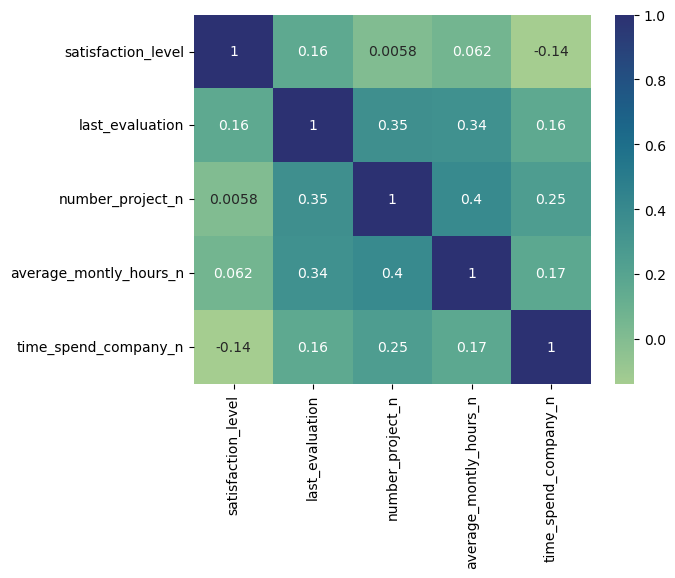

In [141]:
sns.heatmap(df_corr, annot=True, cmap='crest')

##### Вывод:
**Самая сильная** (средняя положительная) взаимосвязь на уровне r = 0.398 наблюдается между количеством проектов (number_projects) и временем, проведённым на рабочем месте в месяц (average_monthly_hours). 

**Наименее слабая взаимосвязь** на уровне r = 0.006 (ниже порога значимости) наблюдается между количеством проектов (number_projects) и уровнем удовлетворённости работой (satisfaction_level). 

## 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [75]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [77]:
# Получаем количество сотрудников в каждом отделе

df.groupby('department').count()[['satisfaction_level']]

,satisfaction_level
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


## 5. Показать распределение сотрудников по зарплатам

In [82]:
df_salary = df.groupby('salary').count()[['satisfaction_level']].sort_values('satisfaction_level', ascending=False)
df_salary

,satisfaction_level
salary,
low,7316
medium,6446
high,1237


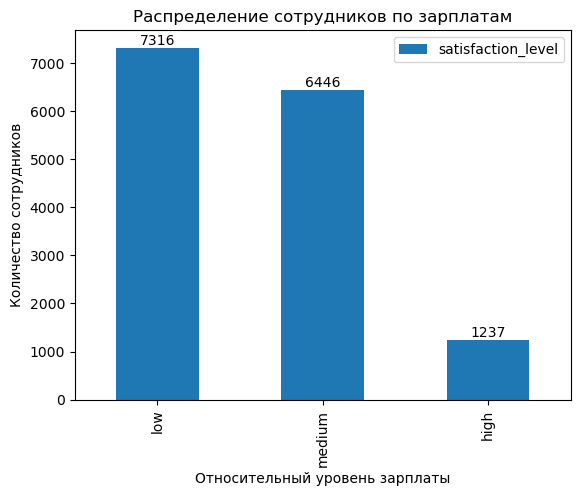

In [84]:
df_salary.plot(kind='bar', title='Распределение сотрудников по зарплатам',
                             xlabel='Относительный уровень зарплаты',
                             ylabel='Количество сотрудников')

# Делаем подписи над столбиками
for i, val in enumerate(df_salary.values): # Цикл итеритуется по всем значениям в рамках наших просуммированных
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})
    # и накладывает подпись при помощи метода .text

## 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [102]:
df_salary_dep = df.pivot_table(index = 'department', columns = 'salary', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)
df_salary_dep

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<Axes: xlabel='department'>

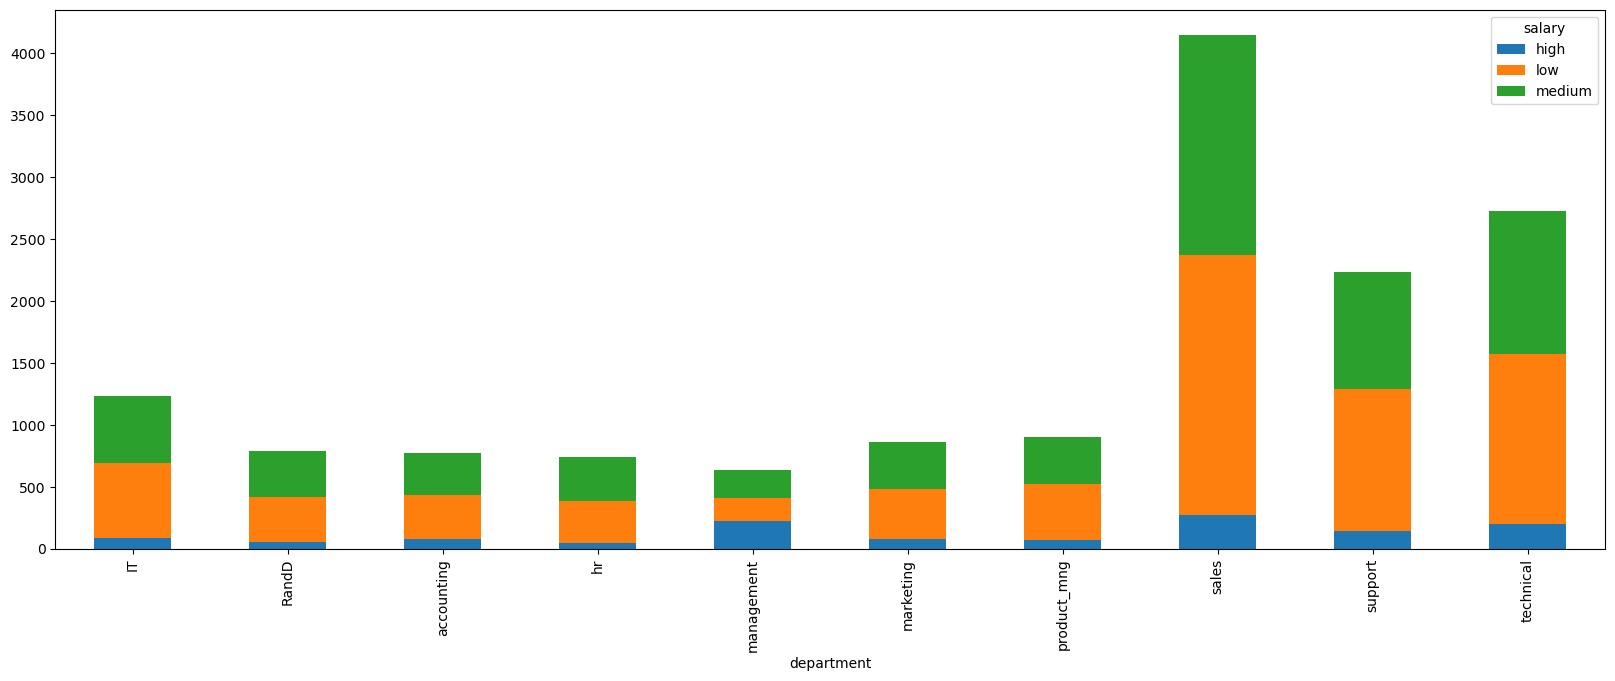

In [94]:
# Сделаем график с накоплением
df_salary_dep.plot(kind='bar', stacked=True, figsize=(20, 7))

## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Поскольку мы уже установили, что наши данные (в частности, параметр average_monthly_hours) закону нормального распределения не подчиняются, используем тест Краскела-Уоллиса

In [96]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [113]:
data_low = df.loc[df.salary == 'low',['average_montly_hours']]
data_medium = df.loc[df.salary == 'medium',['average_montly_hours']]
data_high = df.loc[df.salary == 'high',['average_montly_hours']]

data_lowl = list(data_low['average_montly_hours'])
data_mediuml = list(data_medium['average_montly_hours'])
data_highl = list(data_medium['average_montly_hours'])

stat, p = st.kruskal(data_lowl, data_mediuml, data_highl)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 0.510, p = 0.775
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


##### Вывод:
Гипотеза не подтвердилась: похоже, время, которое проводят на работе сотрудники с разным уровнем оклада, не различается.  

## 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [137]:
t1 = df.pivot_table(index = 'left', columns = 'promotion_last_5years', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)
t1.columns = ['have promotion', 'not promotion']
t1['have_promotion_%'] = t1.apply(lambda a: a['have promotion']/(a['have promotion']+a['not promotion']), axis = 1)
t2 = df.groupby('left').agg({'satisfaction_level': 'mean', 'number_project': 'mean'})
table = t1.join(t2)
table = table[['have_promotion_%', 'satisfaction_level', 'number_project']]
table

,have_promotion_%,satisfaction_level,number_project
left,,,
0,0.973749,0.666810,3.786664
1,0.994679,0.440098,3.855503


## 9.  Модель LDA

- Разделить данные на тестовую и обучающую выборки. 
- Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). 
- Оценить качество модели на тестовой выборке

In [142]:
from sklearn.linear_model import LinearRegression # Устанавливаем модуль регрессионного моделирования
from sklearn.model_selection import train_test_split # Импортируем функцию 

Будем использовать датафрейм со стандартизированными данными, чтобы улучшить качество модели

In [144]:
df_norm

,satisfaction_level,last_evaluation,work_accident,left,promotion_last_5years,department,salary,number_project_n,average_montly_hours_n,time_spend_company_n
0,0.38,0.53,0,1,0,sales,low,0.0,0.285047,0.125
1,0.80,0.86,0,1,0,sales,medium,0.6,0.775701,0.500
2,0.11,0.88,0,1,0,sales,medium,1.0,0.822430,0.250
3,0.72,0.87,0,1,0,sales,low,0.6,0.593458,0.375
4,0.37,0.52,0,1,0,sales,low,0.0,0.294393,0.125
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,0,1,0,support,low,0.0,0.257009,0.125
14995,0.37,0.48,0,1,0,support,low,0.0,0.299065,0.125
14996,0.37,0.53,0,1,0,support,low,0.0,0.219626,0.125
14997,0.11,0.96,0,1,0,support,low,0.8,0.859813,0.250


In [145]:
# Оставим только нужные столбцы
df_lda = df_norm.drop(['department', 'salary'], axis = 1)
df_lda

,satisfaction_level,last_evaluation,work_accident,left,promotion_last_5years,number_project_n,average_montly_hours_n,time_spend_company_n
0,0.38,0.53,0,1,0,0.0,0.285047,0.125
1,0.80,0.86,0,1,0,0.6,0.775701,0.500
2,0.11,0.88,0,1,0,1.0,0.822430,0.250
3,0.72,0.87,0,1,0,0.6,0.593458,0.375
4,0.37,0.52,0,1,0,0.0,0.294393,0.125
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,0,1,0,0.0,0.257009,0.125
14995,0.37,0.48,0,1,0,0.0,0.299065,0.125
14996,0.37,0.53,0,1,0,0.0,0.219626,0.125
14997,0.11,0.96,0,1,0,0.8,0.859813,0.250


In [147]:
X = df_lda[['satisfaction_level', 'last_evaluation', 'work_accident', 'promotion_last_5years', 
        'number_project_n', 'average_montly_hours_n', 'time_spend_company_n']]
y = df_lda['left']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31) # Разделение выборки на обучающую и тестовую

In [158]:
lm = LinearRegression() # Считаем модель линейной регрессии

In [159]:
lm.fit(X_train, y_train)

LinearRegression()

In [166]:
# Коэффициенты модели
pd.DataFrame(lm.coef_ , X.columns, columns=['Коэффициенты'])

,Коэффициенты
satisfaction_level,-0.663987
last_evaluation,0.094342
work_accident,-0.152100
promotion_last_5years,-0.151925
number_project_n,-0.171904
average_montly_hours_n,0.130249
time_spend_company_n,0.271656


In [161]:
lm.intercept_ # свободный член b

0.5497269457138096

In [162]:
y_pred = lm.predict(X_test)
y_pred # Предсказываем значения Y

array([-0.01701451,  0.15032095,  0.24141605, ...,  0.11809907,
        0.37711156,  0.58806026])

In [163]:
# Проверяем модель
# В моделях с разным количеством признаков коэфициент детерминации всегда выше сам по себе

import sklearn.metrics as metrics
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

R2: 0.18569224226125747
MAE: 0.30886448453865184
MSE: 0.14931731899824918
RMSE: 0.38641599216162004


R2 низкий, качество модели, соответственно, тоже

<Axes: xlabel='left', ylabel='Count'>

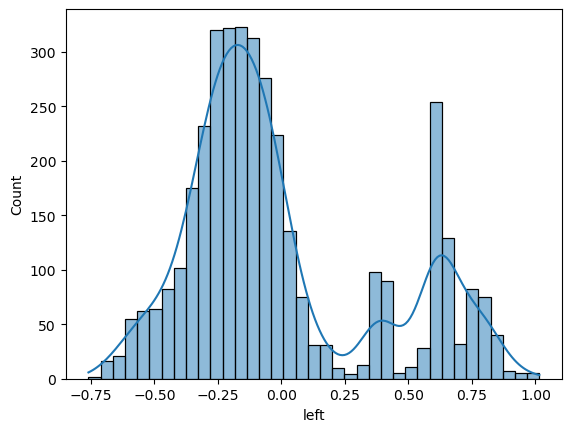

In [155]:
sns.histplot((y_test-y_pred), kde=True)

Ну и график остатков не очень напоминает нормальное распределение. Над моделью надо бы ещё поработать. 